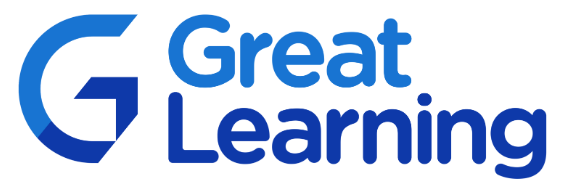

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.


# EDA & Data Preprocessing on Google App Store Rating Dataset.

# <font color = 'green'> **1. Import required libraries and read the dataset.**

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
from sklearn.preprocessing import LabelEncoder


In [5]:
# Read the dataset
df = pd.read_csv('Apps_data+(1).csv')

# <font color = 'green'> **2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [6]:
#Sample
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4403,Dark Infusion Substratum Theme for Android N & O,PERSONALIZATION,4.8,133,59M,"1,000+",Paid,$2.49,Everyone,Personalization,"August 3, 2018",15.6,7.0 and up
5890,Graffiti Letters (A-Z),LIFESTYLE,3.9,386,7.9M,"50,000+",Free,0,Everyone,Lifestyle,"February 18, 2017",2.1.5,4.0 and up
9342,Fashion Pony Girls Dress Up Makeup Game,FAMILY,4.5,256,30M,"10,000+",Free,0,Everyone,Simulation,"July 13, 2018",1.7,4.0 and up
2621,LinkedIn,SOCIAL,4.2,1225367,Varies with device,"100,000,000+",Free,0,Everyone,Social,"August 2, 2018",4.1.202,5.0 and up
7697,CP Installer App,BUSINESS,5.0,4,24M,100+,Free,0,Everyone,Business,"July 24, 2018",5.1.1,4.1 and up


In [7]:
#shape
df.shape

(10841, 13)

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# <font color = 'green'> **3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.**

In [9]:
# Summary Statistics for numrical Column
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# Summary Statistics for categorical Column
df.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


# The columns that need to be worked upon for model building
'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price','Content Rating'

# <font color = 'green'> **4. Check if there are any duplicate records in the dataset? if any drop them.**

In [11]:
# Check the duplicate Values
df.duplicated().sum()

483

In [12]:
# Drop the duplicates
df.drop_duplicates(keep='last',inplace=True)

In [13]:
# Recheck Whether Duplicates are droped 
df.duplicated().sum()

0

In [14]:
df.shape

(10358, 13)

# <font color = 'green'> **5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.**

In [15]:
# Unique 
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [16]:
df = df.drop(df[df['Category']=='1.9'].index)

In [17]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

# <font color = 'green'> **6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**

In [18]:
df['Rating'].isnull().sum()


1465

In [19]:
df=df.drop(df[df['Rating'].isnull()].index)

In [20]:
df['Rating'].isna().sum()

0

In [21]:
df['Rating_category'] = df['Rating'].apply(lambda x:"high" if x > 3.5 else "low")

In [22]:
df.shape

(8892, 14)

# <font color = 'green'> **7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

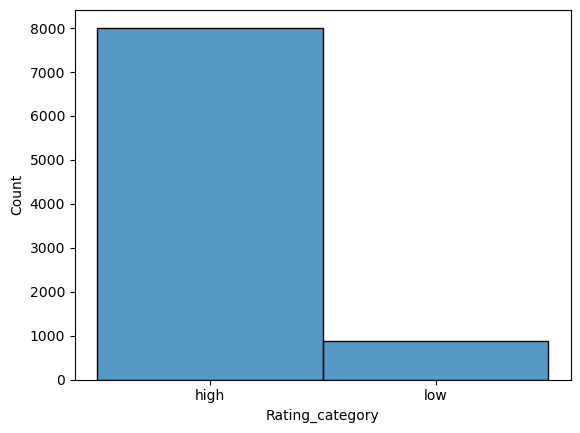

In [23]:
sns.histplot(df['Rating_category'])
plt.show()

from the above Histogram we can see that the  distribution of the column 'Rating_category'
the count of Apps having High rating is more as compare to Apps having low rating.

# <font color = 'green'> **8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)**

In [24]:
df['Reviews'] = df['Reviews'].astype(int)

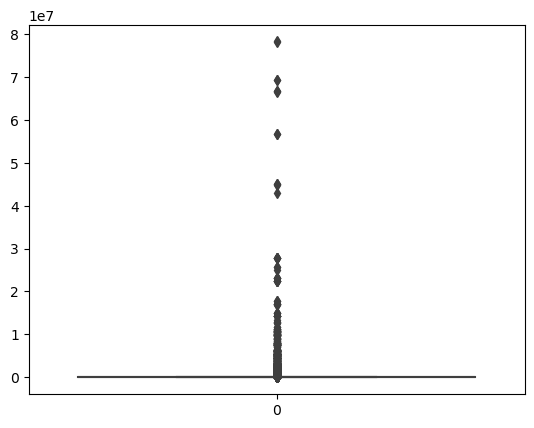

In [25]:
sns.boxplot(df['Reviews'])
plt.show()

In [26]:
#log transformation
df['Reviews']=np.log(df['Reviews'])

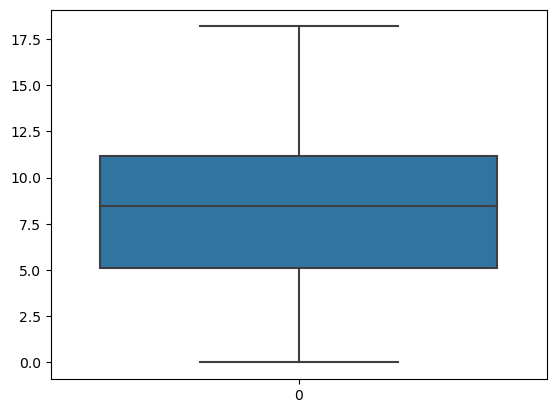

In [27]:
sns.boxplot(df['Reviews'])
plt.show()

# <font color = 'green'> **# <font color = 'green'> **9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')****

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [29]:
df = df.drop(df[df['Size']=='Varies with device'].index)

In [30]:
df['Size']=df['Size'].str.replace('M','*1000000').str.replace('k','*1000').apply(eval)

# <font color = 'green'> **# <font color = 'green'> **10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.****

In [31]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [32]:
df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(int)

# <font color = 'green'> **# <font color = 'green'> **11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.****

In [33]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.117994,5600000.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,high
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.181784,19000000.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,high
7,Infinite Painter,ART_AND_DESIGN,4.1,10.513661,29000000.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,high
8,Garden Coloring Book,ART_AND_DESIGN,4.4,9.531771,33000000.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,high
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,4.795791,3100000.0,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,high


In [34]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$3.49', '$10.99', '$7.49', '$1.50', '$15.99',
       '$79.99', '$9.00', '$24.99', '$10.00', '$16.99', '$11.99',
       '$29.99', '$14.99', '$5.49', '$33.99', '$12.99', '$39.99',
       '$19.99', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$2.49', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61',
       '$1.59', '$6.49', '$1.29', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08',
       '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29',
       '$3.28', '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'],
      dtype=object)

In [35]:
df['Price']=df['Price'].str.replace('$','').astype(float)

#  <font color = 'green'>  12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)
****

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


In [37]:
df.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [38]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,high


# <font color = 'green'> **13. Encode the categorical columns.**

In [39]:
df.select_dtypes(include=object).columns

Index(['Category', 'Type', 'Content Rating', 'Rating_category'], dtype='object')

In [40]:
object_columns=['Category', 'Reviews', 'Type', 'Content Rating', 'Rating_category']

In [41]:
def do_lable_encoding(s1):
    le=LabelEncoder()
    return le.fit_transform(s1)
for col in object_columns:
    df[col]=do_lable_encoding(df[col])

In [42]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,158,19000000.0,10000,0,0.0,1,0
1,0,707,14000000.0,500000,0,0.0,1,0
2,0,3385,8700000.0,5000000,0,0.0,1,0
3,0,3858,25000000.0,50000000,0,0.0,4,0
4,0,707,2800000.0,100000,0,0.0,1,0


# <font color = 'green'> **14. Segregate the target and independent features (Hint: Use Rating_category as the target)**

In [43]:
X=df.drop("Rating_category",axis=1)

In [44]:
y=df[["Rating_category"]]

# <font color = 'green'> **15. Split the dataset into train and test.**

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30)

# <font color = 'green'> **16. Standardize the data, so that the values are within a particular range.**

In [46]:
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()

In [47]:
X_train=ms.fit_transform(X_train)

In [48]:
X_test = ms.transform(X_test)

# Model buidling - Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
lr.score(X_train,y_train)

0.05740088914468566

In [53]:
lr.score(X_test,y_test)

0.06169997444329933